**Singular Value Decomposition**

The code begins by artificially creating a matrix $W$ that is "rank-deficient."

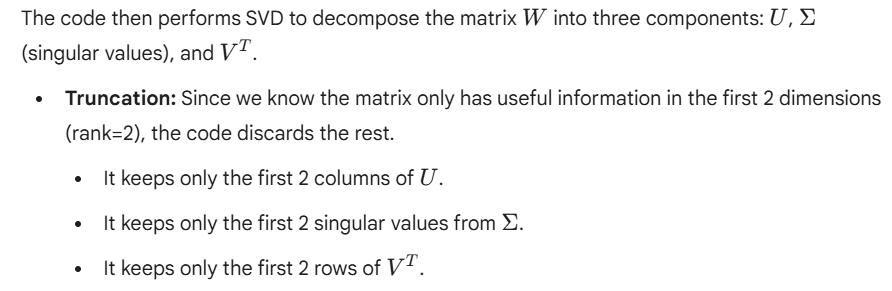

The code then splits the decomposed parts into two new learnable matrices, B and A:
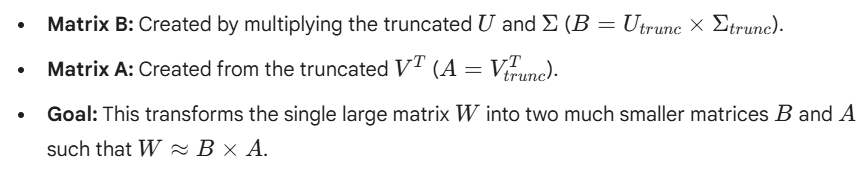

In [ ]:
import torch
import numpy as np
_ = torch.manual_seed(0)

**Q1. Generate a rank-deficient matrix W.**

In [ ]:
d, k = 6, 5

# This way we can generate a rank-deficient matrix
W_rank = 3
W = torch.randn(d,W_rank) @ torch.randn(W_rank,k)
print(W)

tensor([[-0.3510, -1.6374,  0.0989,  3.2097,  0.5348],
        [ 1.1323,  3.0446, -0.3417, -4.0823,  0.2450],
        [-1.2610, -2.5015, -0.1289, -1.2292, -1.0201],
        [-0.1154, -0.3776,  0.0417,  0.6523,  0.0337],
        [-0.7665, -0.5724,  0.2800, -1.1961, -1.4791],
        [-1.6109, -3.7538,  0.0958,  1.6795, -0.8299]])


Evaluate the rank of the matrix W.

In [ ]:
W_rank = np.linalg.matrix_rank(W)
print(f'Rank of W: {W_rank}')

Rank of W: 3


Calculate the SVD decomposition of the W matrix.

In [ ]:
# Perform SVD on W (W = UxSxV^T)
U, S, V = torch.svd(W)

# For rank-r factorization, keep only the first r singular values (and corresponding columns of U and V)
U_r = U[:, :W_rank]
S_r = torch.diag(S[:W_rank])
V_r = V[:, :W_rank].t()  # Transpose V_r to get the right dimensions

# Compute B = U_r * S_r and A = V_r
B = U_r @ S_r
A = V_r
print(f'Shape of B: {B.shape}')
print(f'Shape of A: {A.shape}')

Shape of B: torch.Size([6, 3])
Shape of A: torch.Size([3, 5])


Given the same input, check the output using the original W matrix and the matrices resulting from the decomposition.

In [ ]:
# Generate random bias and input
bias = torch.randn(d)
x = torch.randn(k)

# Compute y = Wx + bias
y = W @ x + bias
# Compute y' = (B*A)x + bias
y_prime = (B @ A) @ x + bias

print("Original y using W:\n", y)
print("")
print("y' computed using BA:\n", y_prime)

Original y using W:
 tensor([  7.0486, -10.6756,  -0.1319,   4.6185,   0.0874,   6.2854])

y' computed using BA:
 tensor([  7.0486, -10.6756,  -0.1319,   4.6185,   0.0874,   6.2854])


In [ ]:
print("Total parameters of W: ", W.nelement())
print("Total parameters of B and A: ", B.nelement() + A.nelement())

Total parameters of W:  30
Total parameters of B and A:  33
